pip install --upgrade pip
sudo apt-get update
sudo apt-get install -y python3-opencv
pip install tensorflow opencv-python seaborn pandas scikit-learn matplotlib numpy

In [1]:
import os
import sys
sys.path.append("../../..")
# openCV
import cv2
# numpy
import numpy as np
# matplotlib
import matplotlib.pyplot as plt
# class util functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import utils.classifier_utils as clf_util

# Import sklearn metrics
from sklearn import metrics
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# cifar10 dataset
from tensorflow.keras.datasets import cifar10

2024-03-11 20:11:28.817146: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 20:11:28.821778: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-11 20:11:28.897942: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-11 20:11:30.018810: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# loading the cifar10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [ ]:
plt.imshow(X_train[50])
plt.show()
y_train[50]

question: should we preprocess the testing data?

In [3]:
X_train_list=[]
X_test_list=[]

for image in X_test: # preprocessing the testing images
    gray_test = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
    normalized = gray_test/255 # normalize
    X_test_list.append(normalized) # add to list
X_preprocess_test_array = np.array(X_test_list) # turn list back into an array
# reshape
X_preprocess_test = X_preprocess_test_array.reshape(-1, 1024)

for image in X_train: # preprocessing the training images
    gray_train = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
    normalized = gray_train/255 # normalize
    X_train_list.append(normalized) # add to list
X_preprocess_train_array = np.array(X_train_list) # turn list back into an array
# reshape
X_preprocess_train = X_preprocess_train_array.reshape(-1, 1024)

X_preprocess_train.shape
X_preprocess_test.shape

(10000, 1024)

In [ ]:
# View an image
# plt.imshow(X_preprocess_train[0])
# plt.show()

In [4]:
# making a logistic regression classifier
clf = LogisticRegression(tol=0.1, 
                         solver='saga',
                         multi_class='multinomial').fit(X_preprocess_train, y_train)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#classes = sorted(set(y_train))

In [24]:
# testing accuracy and making a classification report for the logistic regression classifier
y_pred = clf.predict(X_preprocess_test)
cm = metrics.classification_report(y_test, y_pred)
print(cm)

# saving classification report as a .txt file
text_file = open(r'../output/LR_classification_report.txt', 'w')
text_file.write(cm)
text_file.close()

              precision    recall  f1-score   support

           0       0.34      0.39      0.36      1000
           1       0.37      0.38      0.38      1000
           2       0.27      0.20      0.23      1000
           3       0.23      0.14      0.17      1000
           4       0.24      0.21      0.23      1000
           5       0.30      0.31      0.31      1000
           6       0.28      0.33      0.30      1000
           7       0.31      0.31      0.31      1000
           8       0.34      0.42      0.37      1000
           9       0.38      0.45      0.42      1000

    accuracy                           0.31     10000
   macro avg       0.31      0.31      0.31     10000
weighted avg       0.31      0.31      0.31     10000



In [26]:
# try and predict the class of a data point
#clf_util.plot_individual(X_preprocess_train, 
                         #y_test, 
                         #50)

clf_util.predict_unseen(X_preprocess_test[5], clf, y_test)

ValueError: cannot reshape array of size 1024 into shape (1,784)

In [18]:
sliceddataX = X_preprocess_train[0:1000]
sliceddataXtest = X_preprocess_test[0:1000]
sliceddataY = y_train[0:1000]
sliceddataYtest = y_test[0:1000]

In [15]:
# neural network classifier

#create the classifier
classifier = MLPClassifier(activation = "logistic",
                            hidden_layer_sizes = (10,), # 20 neurons in our hidden layer
                            max_iter=500, # 1000 epochs
                            random_state = 42) # random state for reproducibility

# fit the classifier to the data
classifier.fit(sliceddata, sliceddataY)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=500,
              random_state=42)

              precision    recall  f1-score   support

           0       0.24      0.31      0.27       103
           1       0.39      0.37      0.38        89
           2       0.18      0.17      0.17       100
           3       0.02      0.01      0.01       103
           4       0.17      0.21      0.19        90
           5       0.18      0.10      0.13        86
           6       0.22      0.29      0.25       112
           7       0.27      0.27      0.27       102
           8       0.31      0.40      0.35       106
           9       0.38      0.31      0.34       109

    accuracy                           0.25      1000
   macro avg       0.24      0.24      0.24      1000
weighted avg       0.24      0.25      0.24      1000



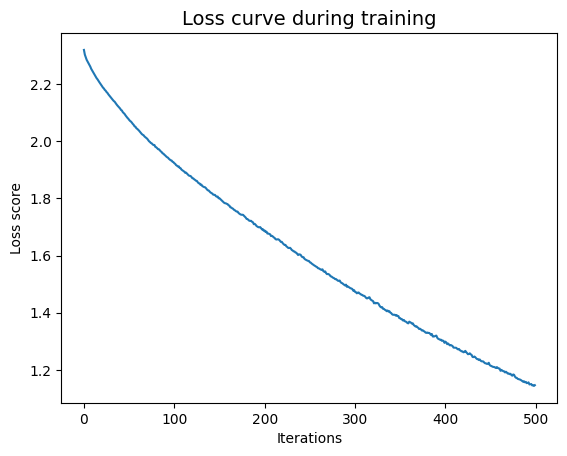

In [23]:
# get predictions
y_pred = classifier.predict(sliceddataXtest)

# use confusion matrix to check performance
#metrics.ConfusionMatrixDisplay.from_estimator(classifier,           # the classifier name
                                            #sliceddataX,            # the training features
                                            #sliceddataY,            # the training labels
                                            #cmap=plt.cm.Blues,      # make the colours prettier
                                            #labels=["FAKE", "REAL"])# the labels in the data arranged alphabetically

# get classification report
classifier_metrics = metrics.classification_report(sliceddataYtest, y_pred)
print(classifier_metrics)

# saving classification report as a .txt file
text_file = open(r'../output/MLP_classification_report.txt', 'w')
text_file.write(classifier_metrics)
text_file.close()

# plotting loss curves. should ideally have a smooth, steep downwards slope which ends in a plateau
plt.plot(classifier.loss_curve_)
plt.title("Loss curve during training", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Loss score')
plt.show()